## HW

### 1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기

In [5]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [29]:
def plot_likelihood(n, y, a0, b0, scale=10**4):
    
    # prior
    prior = st.beta(a=a0, b=b0)
    
    # Posterior
    post = st.beta(a=a0+n, b=b0+(n-y))
    
    # plotting
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    
    # 원래는 likelihood 앞에 막 이렇게 곱하면 안되지만...
    # 그래도 그 존재라도 알기 위해서... 0이 아니에요 ㅠㅡㅜ
    plt.plot(thetas, scale*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

**1) strong likelihood + uniformative prior**

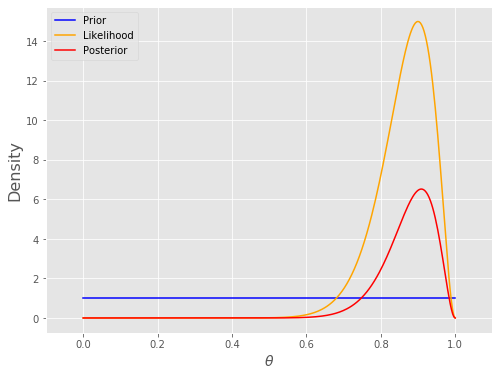

In [40]:
plot_likelihood(n=20, y=18, a0 = 1, b0 = 1)

**2) strong likelihood + weak prior**

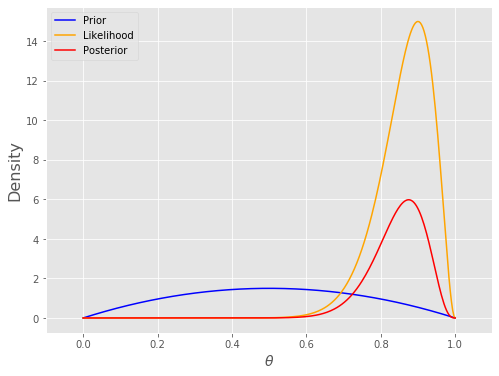

In [42]:
plot_likelihood(n=20, y=18, a0 = 2, b0 = 2)

**3) strong likelihood + strong prior**

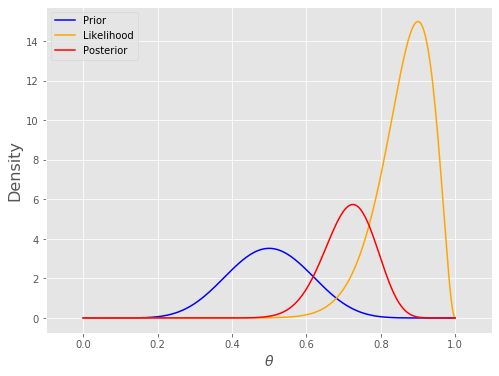

In [43]:
plot_likelihood(n=20, y=18, a0 = 10, b0 = 10)

**4) weak likelihood + uniformative prior**

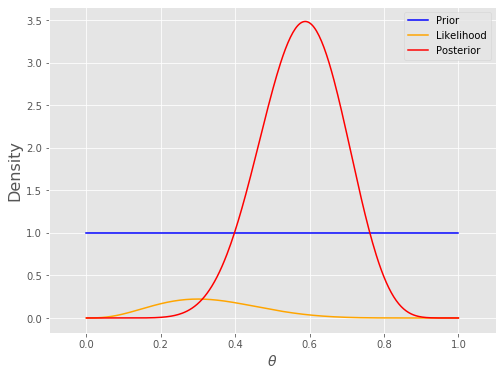

In [48]:
plot_likelihood(n=10, y=3, a0 = 1, b0 = 1, scale=100)

**5) weak likelihood + weak prior**

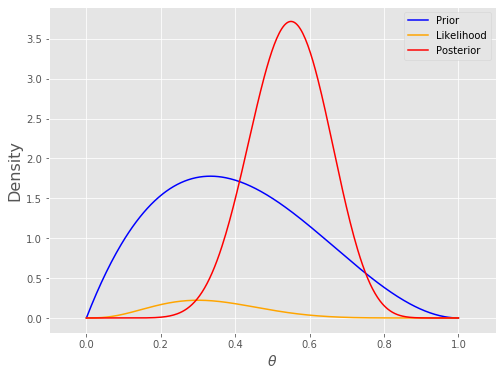

In [50]:
plot_likelihood(n=10, y=3, a0 = 2, b0 = 3, scale=100)

**6) weak likelihood + strong prior**

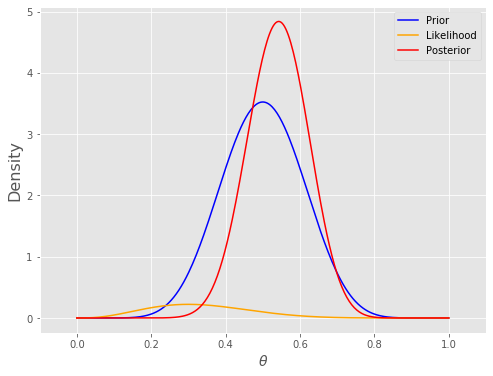

In [49]:
plot_likelihood(n=10, y=3, a0 = 10, b0 = 10, scale=100)

### 2)

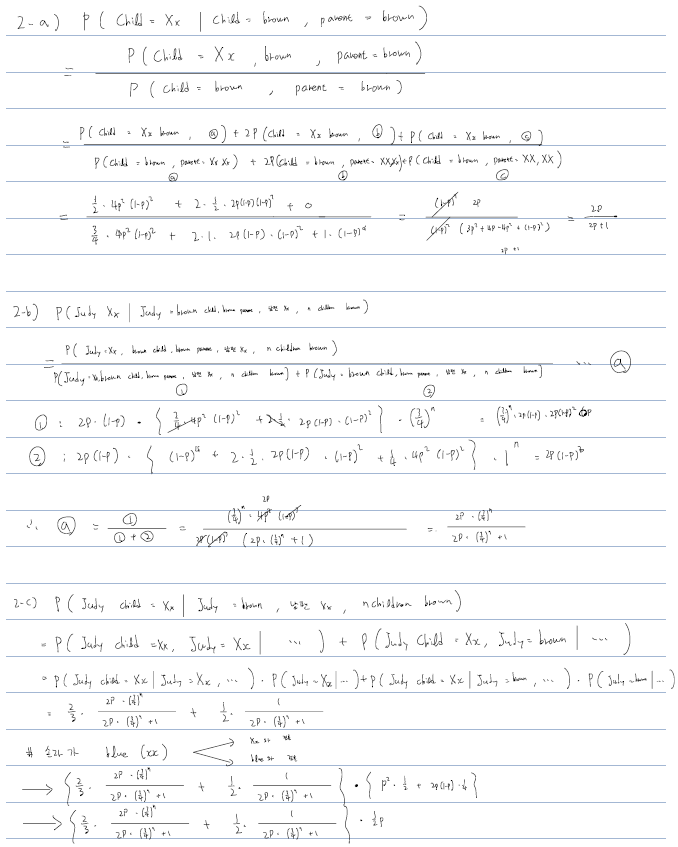

### 3-a)  $\textbf{Beta}$ distribution으로 위의 $\textbf{belief}$을 survival rate에 관한 $\textbf{prior distribution}$으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가?

$\theta$ ~ beta($\alpha, \beta$), E[$\theta$] = 0.9 -> $\alpha$ = 9k, $\beta$ = k
    
P(0.8 < $\theta$ < 0.97) =  0.95 라 가정

In [8]:
# a = 9k, b = k

for i in range(10):
    print('alpha = ',str((i+1)*9), 'beta = ',str(i+1), ": "+str(st.beta.cdf(0.97, 9*(i+1), i+1) - st.beta.cdf(0.8, 9*(i+1), i+1)))

alpha =  9 beta =  1 : 0.626013330654565
alpha =  18 beta =  2 : 0.8071787111726657
alpha =  27 beta =  3 : 0.892715183397574
alpha =  36 beta =  4 : 0.9378685312699843
alpha =  45 beta =  5 : 0.9630476420328056
alpha =  54 beta =  6 : 0.9775813072560174
alpha =  63 beta =  7 : 0.9861808694298634
alpha =  72 beta =  8 : 0.991368387370736
alpha =  81 beta =  9 : 0.9945475074357272
alpha =  90 beta =  10 : 0.9965220119049443


$\alpha$ = 45, $\beta$ = 5 에서 P(0.8 < $\theta$ < 0.97)이 0.95를 넘겼다. 따라서 $\alpha$ = 45, $\beta$ = 5 

### 3-b) 이제 $\textbf{data gathering}$. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 $\textbf{Posterior Distribution}$ 구하기

- 수술 결과의 (사망/생존) 확률이 일정하다고 가정 -> P(x | $\theta$) ~ binom 가정

- 이 경우 posterior는 beta(a+x, b+n-x)

- n = x = 10 => posterior ~ beta(55,5)

### 3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

In [9]:
# 다음 환자가 생존할 확률 = 0.9167

55/60

0.9166666666666666

In [8]:
# 다음 20명 환자 중 2명 이상 사망할 확률 = 1 - P(0명 사망) -P(1명 사망)

1 - (55/60)**20 - ((55/60)**19 * (5/60)*20)

0.5054641376518498